STUDENTS MARKS ANALYSIS:

In [55]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as plx
from sklearn.model_selection import train_test_split

In [30]:
student_data=pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (2)\Student_Marks.csv")

In [31]:
student_data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [32]:
student_data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

We see that there are no null values in the data set

In [33]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [34]:
student_data.memory_usage()

Index             132
number_courses    800
time_study        800
Marks             800
dtype: int64

In [ ]:
df=student_data.copy()

In [35]:
df.Marks.unique()

array([19.202,  7.734, 13.811, 53.018, 55.299, 17.822, 29.889, 17.264,
       20.348, 30.862, 42.036, 12.132, 24.318, 17.672, 11.397, 19.466,
       30.548, 38.49 , 50.986, 25.133, 22.073, 35.939, 12.209, 28.043,
       16.517,  6.623, 12.647, 26.532,  9.333,  8.837, 24.172,  8.1  ,
       15.038, 39.965, 17.171, 43.978, 13.119, 46.453, 41.358, 51.142,
        7.336, 15.725, 19.771, 10.429,  9.742,  8.924, 16.703, 22.701,
       26.882, 19.106, 40.602, 22.184,  7.892, 36.653, 53.158, 18.238,
       53.359, 51.583, 31.236, 51.343, 10.522, 10.844, 19.59 , 21.379,
       12.591, 13.562, 27.569,  6.185,  8.92 , 21.4  , 16.606, 13.416,
       20.398,  7.014, 39.952,  6.217, 36.746, 38.278, 49.544,  6.349,
       54.321, 17.705, 44.099, 16.106, 16.461, 39.957, 23.149,  6.053,
       11.253, 40.024, 24.394, 19.564, 23.916, 42.426, 24.451, 19.128,
        5.609, 41.444, 12.027, 32.357])

In [36]:
df.time_study.value_counts()

time_study
4.508    1
0.096    1
3.133    1
7.909    1
7.811    1
        ..
3.561    1
0.301    1
7.163    1
0.309    1
6.335    1
Name: count, Length: 100, dtype: int64

We see that maximum courses that a student can take is 8 courses

In [37]:
count=df.number_courses.value_counts
count

<bound method IndexOpsMixin.value_counts of 0     3
1     4
2     4
3     6
4     8
     ..
95    6
96    3
97    4
98    7
99    3
Name: number_courses, Length: 100, dtype: int64>

Distribution of Marks:

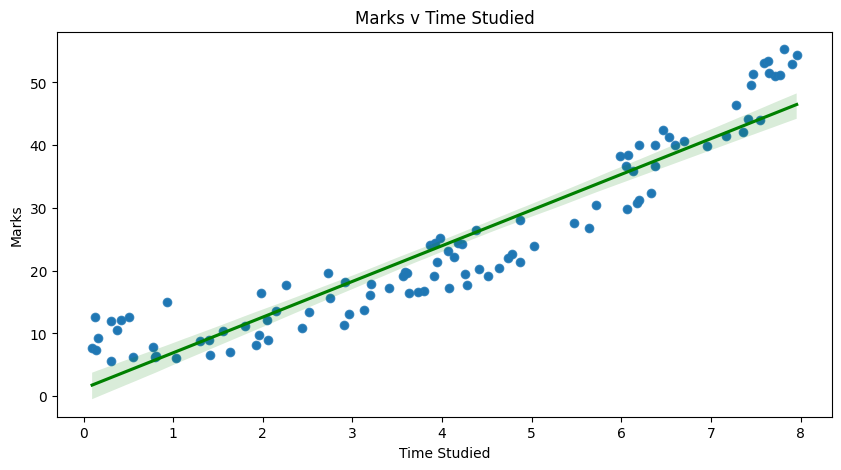

In [40]:
plt.figure(figsize=(10,5))
plt.title('Marks v Time Studied')
plt.xlabel('Time Studied')
plt.ylabel('Marks')
sns.scatterplot(data=df,y=df['Marks'].unique(),x=df['time_study'].unique())
ax = sns.regplot(data=df, y=df['Marks'].unique(), x=df['time_study'].unique(), line_kws={'color': 'g'})
plt.show()

We see that if a student spends more time studying then they are more than likely to score more marks 

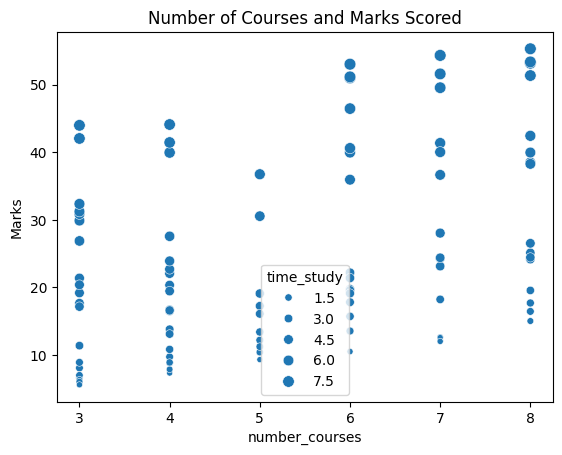

In [41]:
plt.title("Number of Courses and Marks Scored")
figure = sns.scatterplot(data=df, x = df["number_courses"], 
                    y = df["Marks"], size = df["time_study"])
plt.show()

From the correlation plot we can see that Number of courses a student has does not really affect their marks

In [42]:
df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


Creating a new column where we have time given per course:

In [43]:
df['time_division'] = df['number_courses']/df['time_study']
df.head()

,number_courses,time_study,Marks,time_division
0,3,4.508,19.202,0.665484
1,4,0.096,7.734,41.666667
2,4,3.133,13.811,1.276732
3,6,7.909,53.018,0.758629
4,8,7.811,55.299,1.024197


In [44]:
df.corr()

,number_courses,time_study,Marks,time_division
number_courses,1.000000,0.204844,0.417335,0.068316
time_study,0.204844,1.000000,0.942254,-0.529687
Marks,0.417335,0.942254,1.000000,-0.340899
time_division,0.068316,-0.529687,-0.340899,1.000000


Dividing the dataset training for the model

In [45]:
x = np.array(df[['time_study','number_courses','time_division']])
y = np.array(df['Marks'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr, ridge, lasso = LinearRegression(fit_intercept=True),Ridge(alpha=0.2), Lasso(alpha=0.2)

In [47]:
lr.fit(x_train,y_train)
score_lr = lr.score(x_test,y_test)

### Ridge 
ridge.fit(x_train,y_train)
score_r = ridge.score(x_test,y_test)

### LASSO
lasso.fit(x_train,y_train)
score_l = lasso.score(x_test,y_test)

print(f'Score for Linear Regression is {score_lr}')
print(f'Score for Ridge Regression is {score_r}')
print(f'Score for LASSO Regression is {score_l}')

Score for Linear Regression is 0.9589586600247426
Score for Ridge Regression is 0.9589586233910893
Score for LASSO Regression is 0.9590694738287725


We pick the model with the highest score:

In [48]:
scores = {lr:score_lr,ridge:score_r,lasso:score_l}
ls = []
for i in scores.values():
    ls.append(i)
model = [key for key, value in scores.items() if value == max(ls)]
model_final = model[0]
print(model_final)

Lasso(alpha=0.2)


In [49]:
model_final.predict([ [3.736, 4., 1.07066381]])

array([19.80317823])

In [50]:
model_final.predict([[10,5,0.533]])

array([58.36658043])

Making a classification model to classify students based on the marks scored:

In [51]:
# Define class ranges
bins = [0,10, 20, 30, 40, 50]
labels = ['Bad','Below Average', 'Average', 'Good', 'Excellent']
df['Class'] = pd.cut(df['Marks'], bins=bins, labels=labels)
df['Class'].fillna(method='bfill', inplace=True)
df.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19800\1715735016.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class'].fillna(method='bfill', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19800\1715735016.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Class'].fillna(method='bfill', inplace=True)


number_courses    0
time_study        0
Marks             0
time_division     0
Class             0
dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[['number_courses', 'time_study']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = RandomForestClassifier(bootstrap=True,n_estimators=100,max_features="log2")
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

      Average       0.75      0.75      0.75         4
          Bad       1.00      0.40      0.57         5
Below Average       0.43      0.50      0.46         6
    Excellent       0.33      1.00      0.50         1
         Good       0.50      0.50      0.50         4

     accuracy                           0.55        20
    macro avg       0.60      0.63      0.56        20
 weighted avg       0.65      0.55      0.56        20



In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3, 0, 1, 0, 0],
       [0, 2, 3, 0, 0],
       [1, 0, 3, 0, 2],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 2, 2]])

In [54]:
num_courses, time_studied = 3, 6.8
time_studied=float(time_studied)
result = model2.predict([[num_courses,time_studied]])               
result = list(result)     
print(f'Your remark is =>> {result[0]}')

Your remark is =>> Good


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
